# Upper Confidence Bound

In [1]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# not sure which ad to use on social network 
# find ad with highest ctr (click through rate)
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
# UCB - learns from the observations before, then shows an ad  (online learning)
# Implementing UCB
# To run in python 2, make sure the math functions are correct
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        # after first ten, it will begin to do online learning
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            # keep track of which ad for new max_upper_bound
            max_upper_bound = upper_bound
            ad = i
    # update that ad i was selected
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

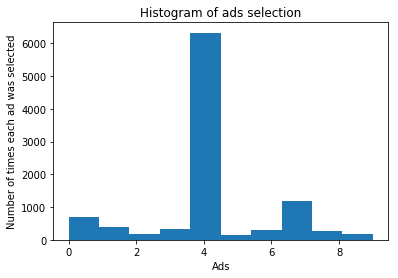

In [5]:
# visulizing results
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()